In [27]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['target_names', 'feature_names', 'DESCR', 'data', 'target'])

In [5]:
model = KMeans(n_clusters=3)

In [6]:
model.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = model.predict(iris.data)

In [8]:
xs = iris.data[:,0]
ys = iris.data[:,2]

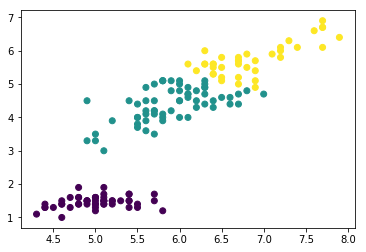

In [9]:
plt.scatter(xs, ys, c=labels)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [12]:
df = pd.DataFrame({'labels': labels, 'species': iris.target})

In [13]:
ct = pd.crosstab(df['labels'], df['species'])

In [14]:
print(ct)

species   0   1   2
labels             
0        50   0   0
1         0  48  14
2         0   2  36


In [15]:
clusters = range(1,10)
inertias = []

In [16]:
for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    model.fit(iris.data)
    inertias.append(model.inertia_)

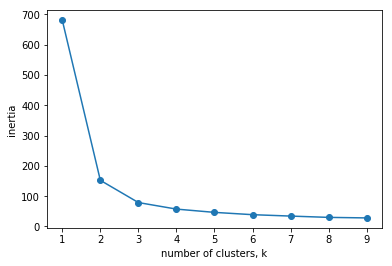

In [17]:
plt.plot(clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()

### t-SNE maps samples to 2D (or 3D) space from a higher dimensional space. Map approximately preserves nearness of sample. Great for inspecting dataset

In [18]:
iris.keys()

dict_keys(['target_names', 'feature_names', 'DESCR', 'data', 'target'])

In [19]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(iris.data)

In [20]:
xs = transformed[:,0]
ys = transformed[:,1]

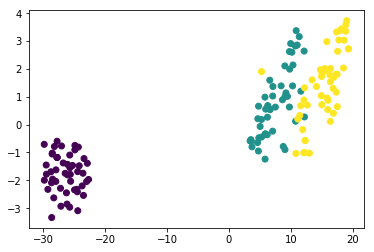

In [21]:
plt.scatter(xs, ys, c=iris.target)

## Decorrelating your data and dimension reduction

In [22]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [24]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [30]:
df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/fish.csv' , header=None)

In [35]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [38]:
df = df.drop(columns=[0])

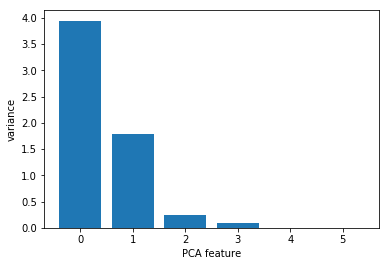

In [40]:
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Shows that only 2 PCA features have significant variance, i.e. the intrinsic dimension of the fish measurements. This means that only we have done dimension redection and found out that only 2 features are important